<a href="https://colab.research.google.com/github/Jeongho-Kim-kr/Python_ML/blob/main/1_basic/%EA%B8%B0%EB%B3%B8_%EC%A0%95%EB%A0%AC_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98_%EB%B9%84%EA%B5%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 중간고사 대체 과제(산업정보화 2분반 12170621 김정호)
파이썬으로 아래의 정렬 알고리즘들을을 구현하고, 10개부터 10만개 데이터를 랜덤으로 생성하여 알고리즘 수행 시간을 비교해보세요

In [ ]:
import random
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 원본 데이터 생성

In [ ]:
alist = random.sample(range(1,10000000),100000)

In [ ]:
print(alist[0:10])
print(len(alist))

[5321534, 9578825, 3247063, 3941456, 87079, 1618158, 2080188, 8001766, 8113954, 907522]
100000


## 테스트 범위 생성

In [ ]:
test_range = []
for exponent in range(1, 6):
    test_range.append(10 ** exponent) #10의1승부터 10의 5승.
print(test_range)

[10, 100, 1000, 10000, 100000]


## 1. 버블정렬

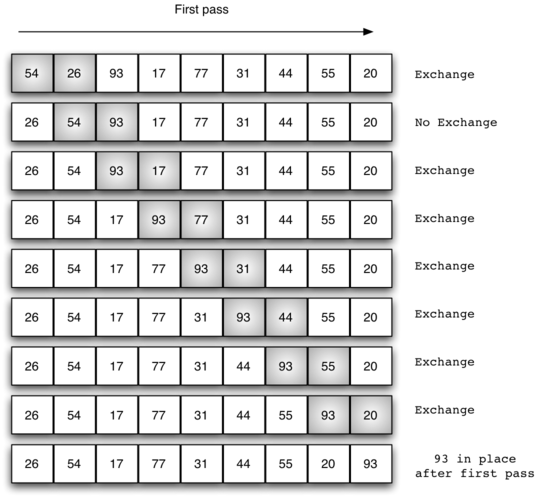

In [ ]:
def bubble_sort(alist):
    for passnum in range(len(alist)-1,0,-1):   # range(9,0,-1) -> 9, 8, 7, 6, 5, 4, 3, 2, 1
        for i in range(passnum):               # range(9) ... range(8) .... ->
            if alist[i]>alist[i+1]:            # 왼쪽이 오른쪽보다 클때, 위치를 바꿔줘야함
                # temp = alist[i]
                # alist[i] = alist[i+1]
                # alist[i+1] = temp
                alist[i], alist[i+1] = alist[i+1], alist[i]

### 버블정렬 결과

In [ ]:
def time_calculation(test_range):   # [10, 100, 1000, 10000, 100000]

    result = []       # y축에 들어가는 실제 시간 데이터 
    for i in test_range:
        start_time = time.time()
        copy_list = alist[:i]
        bubble_sort(copy_list)
        elapsed_time = time.time() - start_time
        result.append(elapsed_time)
    return result

In [ ]:
output_bubble = time_calculation(test_range)

In [ ]:
output_bubble

[1.6689300537109375e-05,
 0.0010154247283935547,
 0.11318683624267578,
 11.400179386138916,
 1395.028115272522]

## 2. 선택정렬

In [ ]:
def find_smallest(arr):
    smallest = arr[0]  # 가장 작은 정수를 저장
    smallest_index = 0 # 가장 작은 정수의 인덱스를 저장
    for i in range(1,len(arr)):
        if arr[i] < smallest:
            smallest = arr[i]
            smallest_index = i
    return smallest_index

In [ ]:
def selection_sort(arr): # 입력값: 배열
    newArr = []
    for i in range(len(arr)):
        smallest = find_smallest(arr)  # 배열에서 가장 작은 정수를 찾아서 새로운 배열에 추가합니다.
        newArr.append(arr.pop(smallest))
    return newArr

### 선택정렬 결과

In [ ]:
def time_calculation2(test_range):   # [10, 100, 1000, 10000, 100000]

    result = []       # y축에 들어가는 실제 시간 데이터 
    for i in test_range:
        start_time = time.time()
        copy_list = alist[:i]
        selection_sort(copy_list)
        elapsed_time = time.time() - start_time
        result.append(elapsed_time)
    return result

In [ ]:
output_selection = time_calculation2(test_range)

In [ ]:
output_selection

[2.7418136596679688e-05,
 0.0004432201385498047,
 0.04303407669067383,
 3.7065887451171875,
 391.6199908256531]

## 3. 합병정렬

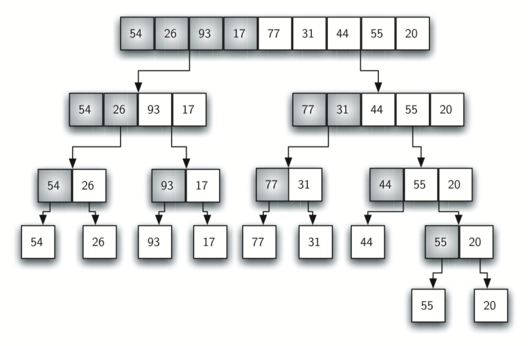

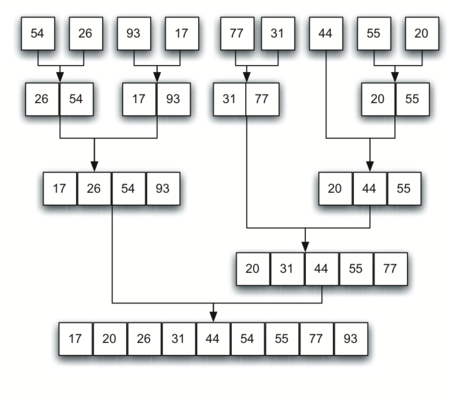

In [ ]:
def merge_sort(list):
    if len(list) <= 1:
        return list

    mid = len(list) // 2
    leftList = list[:mid]
    rightList = list[mid:]
    
    leftList = merge_sort(leftList)
    rightList = merge_sort(rightList)
    return merge(leftList, rightList)

In [ ]:
def merge(left, right):
    result = []
    while len(left) > 0 or len(right) > 0:
        if len(left) > 0 and len(right) > 0:
            if left[0] <= right[0]:
                result.append(left[0])
                left = left[1:]
            else:
                result.append(right[0])
                right = right[1:]
        elif len(left) > 0:
            result.append(left[0])
            left = left[1:]
        elif len(right) > 0:
            result.append(right[0])
            right = right[1:]
    return result

### 합병정렬 결과

In [ ]:
def time_calculation3(test_range):   # [10, 100, 1000, 10000, 100000]

    result = []       # y축에 들어가는 실제 시간 데이터 
    for i in test_range:
        start_time = time.time()
        copy_list = alist[:i]
        merge_sort(copy_list)
        elapsed_time = time.time() - start_time
        result.append(elapsed_time)
    return result

In [ ]:
output_merge = time_calculation3(test_range)

In [ ]:
output_merge

[5.7220458984375e-05,
 0.0009210109710693359,
 0.0168609619140625,
 0.25380516052246094,
 32.254729986190796]

## 4. 퀵정렬

In [ ]:
def quick_sort(array):
    if len(array) < 2:
        return array            # 기본 단계: 원소의 개수가 0이거나 1이면 이미 정렬되어 있는 상태
    else: 
        pivot = array[0]        # 재귀 단계
        less = []
        greater = [] 
        for i in array[1:]:    
            if i <= pivot:      # 기준 원소보다 작거나 같은 모든 원소로 이루어진 하위 배열
                less.append(i)
            else:               # 기준 원소보다 큰 모든 원소로 이루어진 하위 배열
                greater.append(i)
        return quick_sort(less) + [pivot] + quick_sort(greater)

### 퀵정렬 결과

In [ ]:
def time_calculation4(test_range):   # [10, 100, 1000, 10000, 100000]

    result = []       # y축에 들어가는 실제 시간 데이터 
    for i in test_range:
        start_time = time.time()
        copy_list = alist[:i]
        quick_sort(copy_list)
        elapsed_time = time.time() - start_time
        result.append(elapsed_time)
    return result

In [ ]:
output_quick = time_calculation4(test_range)

In [ ]:
output_quick

[2.0742416381835938e-05,
 0.0002257823944091797,
 0.0023775100708007812,
 0.027183055877685547,
 0.35659217834472656]

## Lineplot

In [ ]:
# Data
df=pd.DataFrame({'x': test_range, 'BubbleSort':output_bubble, 'SelectionSort': output_selection, 'MergeSort': output_merge, 'QuickSort': output_quick})

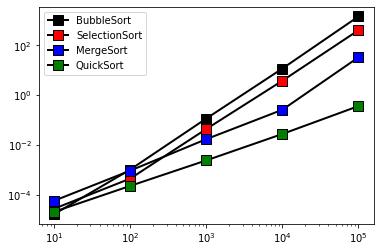

In [ ]:
# multiple line plot
plt.xscale('log')
plt.yscale('log')
plt.plot( 'x', 'BubbleSort', data=df, marker='s', markerfacecolor='black', markersize=10, color='black', linewidth=2)
plt.plot( 'x', 'SelectionSort', data=df, marker='s', markerfacecolor='red', markersize=10, color='black', linewidth=2)
plt.plot('x', 'MergeSort', data=df, marker='s', markerfacecolor='blue', markersize=10, color='black', linewidth=2)
plt.plot('x', 'QuickSort', data=df, marker='s', markerfacecolor='green', markersize=10, color='black', linewidth=2)
plt.legend()